# Deep Learning for Time Series Forecasting: 7-Day Crash Course 
## Lesson 3 Exercise: MLP for Univariate Time Series Forecasting
This workbook constructs, trains, and tests a MLP model using the daily-total-female-births dataset listed in the course materials.
This workbook reads in processed data from the Lesson 2 workbook in this same repository and produces accuracy and loss plots for the trained model.
Attributions for additional libraries are found at the end.

In [1]:
import pandas as pd
import numpy as np
from itertools import product
import itertools
import tensorflow
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import optimizers
import keras
from livelossplot import PlotLossesKeras

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## Data import and processing

In [2]:
input = pd.read_csv('inputs.csv')
output = pd.read_csv('outputs.csv')

## Model definition

In [3]:
input_dim = input.shape[1]
model = Sequential()
model.add(Dense(100, activation='relu', input_dim=input_dim))
model.add(Dropout(0.2))
model.add(Dense(200))
model.add(Dropout(0.3))
model.add(Dense(400))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

## Training Model

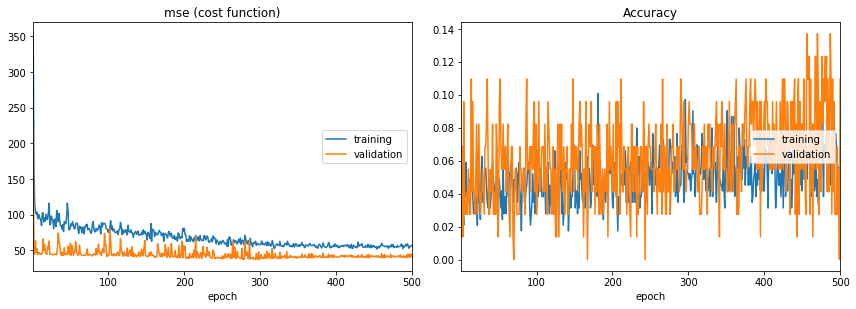

Model Trained


In [4]:
epochs = 500
trained_model = model.fit(input, output, epochs=epochs, verbose=0, validation_split=0.2, callbacks=[PlotLossesKeras()])
print('Model Trained')

PlotLossesKeras library from https://github.com/stared/livelossplot.git

## Hyperparameter Space Exploration

In [5]:
# Hyperparameters:
learning_rate = [0.001, 0.01, 0.1, 0.9]
optimizer_name = ['adam', 'sgd', 'adagrad']
epochs = [100, 200, 500, 1000, 2000]
activation_function = ['relu', 'softmax', 'sigmoid']
lists = [learning_rate, optimizer_name, epochs, activation_function]
hyper_parameter_frame = pd.DataFrame(list(itertools.product(*lists)), columns=['learning_rate', 'optimizer_name', 'epochs', 'activation_function'])
hyper_parameter_frame.head()

,learning_rate,optimizer_name,epochs,activation_function
0,0.001,adam,100,relu
1,0.001,adam,100,softmax
2,0.001,adam,100,sigmoid
3,0.001,adam,200,relu
4,0.001,adam,200,softmax


In [6]:
for index, row in hyper_parameter_frame.iterrows():
    keras.backend.clear_session()
    #print('Hyperparameter vector:')
    #print(row)
    learning_rate = row['learning_rate']
    opt = row['optimizer_name']
    epochs = row['epochs']
    act = row['activation_function']
    # specify optimizer
    if opt == 'adam':
        opt_function = optimizers.Adam(lr=learning_rate)
    elif opt == 'sgd':
        opt_function = optimizers.SGD(lr=learning_rate)
    elif opt == 'adagrad':
        opt_function = optimizers.Adagrad(lr=learning_rate)
    # Build and train model
    input_dim = input.shape[1]
    model = Sequential()
    model.add(Dense(100, activation=act, input_dim=input_dim))
    model.add(Dropout(0.2))
    model.add(Dense(200))
    model.add(Dropout(0.3))
    model.add(Dense(400))
    model.add(Dense(1))
    model.compile(optimizer=opt_function, loss='mse', metrics=['accuracy'])
    trained_model = model.fit(input, output, epochs=epochs, verbose=0, validation_split=0.2)
    print('Model ', index,' Trained')
    # Evaluate model and store data
    hyper_parameter_frame.loc[index, 'Min Train Loss'] = min(list(trained_model.history['loss']))
    hyper_parameter_frame.loc[index, 'Min Val Loss'] = min(list(trained_model.history['val_loss']))
    hyper_parameter_frame.loc[index, 'Max Accuracy'] = max(list(trained_model.history['acc']))
    hyper_parameter_frame.loc[index, 'Max Val Accuracy'] = max(list(trained_model.history['val_acc']))
    
print('All models trained and evaluated')

Model  0  Trained
Model  1  Trained
Model  2  Trained
Model  3  Trained
Model  4  Trained
Model  5  Trained
Model  6  Trained
Model  7  Trained
Model  8  Trained
Model  9  Trained
Model  10  Trained
Model  11  Trained
Model  12  Trained
Model  13  Trained
Model  14  Trained
Model  15  Trained
Model  16  Trained
Model  17  Trained
Model  18  Trained
Model  19  Trained
Model  20  Trained
Model  21  Trained
Model  22  Trained
Model  23  Trained
Model  24  Trained
Model  25  Trained
Model  26  Trained
Model  27  Trained
Model  28  Trained
Model  29  Trained
Model  30  Trained
Model  31  Trained
Model  32  Trained
Model  33  Trained
Model  34  Trained
Model  35  Trained
Model  36  Trained
Model  37  Trained
Model  38  Trained
Model  39  Trained
Model  40  Trained
Model  41  Trained
Model  42  Trained
Model  43  Trained
Model  44  Trained
Model  45  Trained
Model  46  Trained
Model  47  Trained
Model  48  Trained
Model  49  Trained
Model  50  Trained
Model  51  Trained
Model  52  Trained
Mod

In [7]:
hyper_parameter_frame.to_csv('hyperparameter_space_exploration.csv', header=True, index=False)

Based on the hyperparameter space exploration, the following hyper parameters result in the best model for this data: 
- learning_rate = 0.01
- optimizer_name = adam
- epochs= 200
- activation_function = relu

The following are the results of the model trained with these parameters:
- Min Train Loss = 54.35000568
- Min Val Loss = 37.21196924
- Max Accuracy = 0.09375
- Max Val Accuracy = 0.136986301